# Exploratory Data Analysis

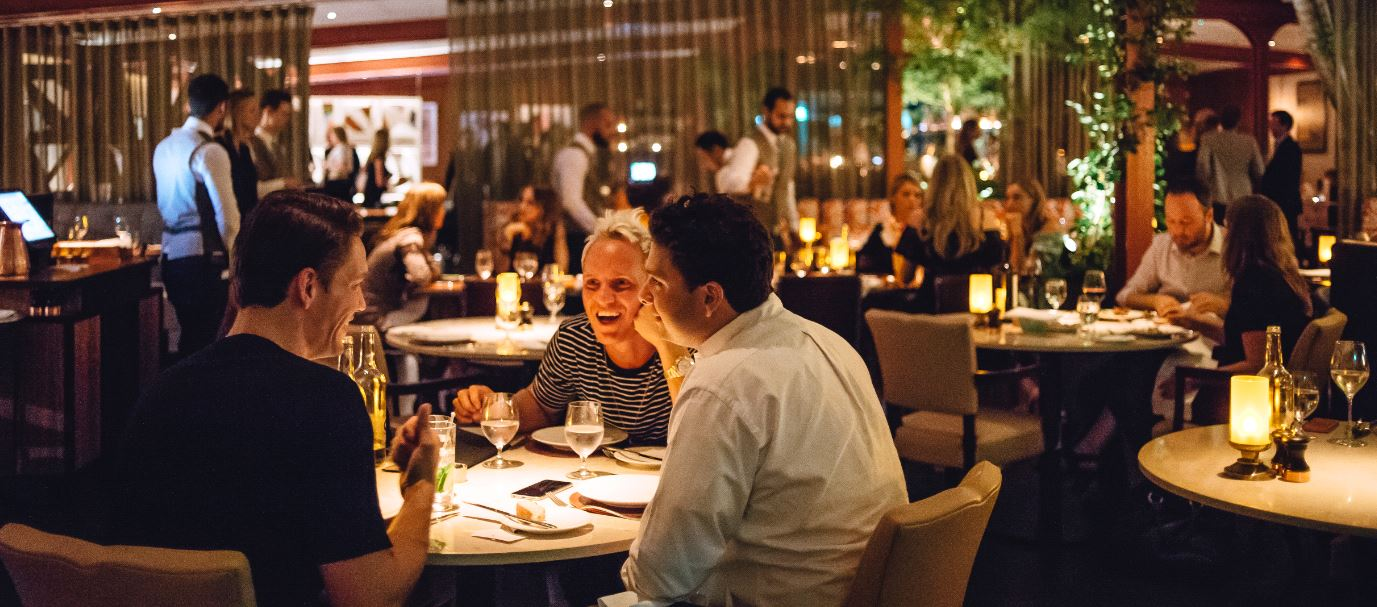

In this notebook, we describe how to use R to perform exploratory data analysis. We use a data set of 300 restaurants based in Los Angeles. For each restaurant, the data set records the quality rating (Good, Very Good, Excellent), average meal price (in dollars), and average wait time (in minutes). 

## Retrieve Data

Read the file and create a data frame

In [1]:
restaurant_df <- read.csv("restaurant_data.csv")

See the first few rows of the data frame

In [3]:
head(restaurant_df)

Restaurant,Quality.Rating,Meal.Price....,Wait.Time..min.
1,Good,18,5
2,Very Good,22,6
3,Good,28,1
4,Excellent,38,74
5,Very Good,33,6
6,Good,28,5


## Descriptive Statistics

Extract a vector of the wait time from the data frame

In [2]:
wait_time <- restaurant_df$Wait.Time..min.

A summary of descriptive statistics for the wait time data

In [5]:
summary(wait_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     5.0    12.0    13.9    18.0    94.0 

This output indicates that the minimum wait time is 0, the first quartile of the wait time data is 5 minutes, the median is 12 minutes, the mean is 13.92 minutes, the third quartile is 18 minutes, and the maximum value is 94 minutes.

Generate a five-number summary for the wait time data 
that computes the minimum, the first quartile, the median, the third quartile, and the maximum values for the data

In [17]:
fivenum(wait_time)

[1]  0  5 12 18 94

There are many different ways to compute percentiles and quartiles. In fact, the method used to compute quartiles in R with the `fivenum` command is different than the method used to compute quartiles with the `summary` command. While in this particular example, the two approaches yield the same result, in general, we may see slightly different values, as shown in the following example. 

In [18]:
x<-c(1,3,5,7,8,9,0,6)

summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.500   5.500   4.875   7.250   9.000 

In [19]:
fivenum(x)

[1] 0.0 2.0 5.5 7.5 9.0

Note that in the above example, the first quartile and the third quartile produced by the `summary` command *differ* from their counterparts produced by the `fivenum` command.

R allows for *nine* different ways (defined as “types”) of calculating percentiles and quartiles. You can control this explicitly using the R function `quantile`. For instance, R’s `type=6` approach to calculating percentiles matches that used by the Excel function `PERCENTILE.EXC`.

Calculate the first quartile for the wait time data

In [20]:
quantile(wait_time,0.25,type = 6)

25% 
  5

Calculate the first quartile for `x`

In [21]:
quantile(x,0.25,type = 6)

25% 
1.5

Show descriptive statistics of meal price and wait time (the 3rd and 4th columns of data frame `restaurant_df`)

In [17]:
library(psych)
describe(restaurant_df[3:4])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Meal.Price....,1,300,25.90,9.288,25,25.53,10.378,10,48,38,0.3053,-0.6106,0.5362
Wait.Time..min.,2,300,13.92,12.838,12,11.90,8.896,0,94,94,2.1936,7.8484,0.7412


In [18]:
describe(restaurant_df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Restaurant,1,300,150.50,86.7468,150.5,150.50,111.1950,1,300,299,0.0000,-1.2120,5.00833
Quality.Rating*,2,300,2.28,0.8023,2.5,2.35,0.7413,1,3,2,-0.5438,-1.2465,0.04632
Meal.Price....,3,300,25.90,9.2876,25.0,25.53,10.3782,10,48,38,0.3053,-0.6106,0.53622
Wait.Time..min.,4,300,13.92,12.8382,12.0,11.90,8.8956,0,94,94,2.1936,7.8484,0.74121


## Boxplots

Create a boxplot using the `boxplot` command, where `xlab=` provides a label for the horizontal (x) axis; `horizontal=TRUE` changes the orientation of the boxplot from the default vertical to horizontal; `col` sets the color of the boxplot.

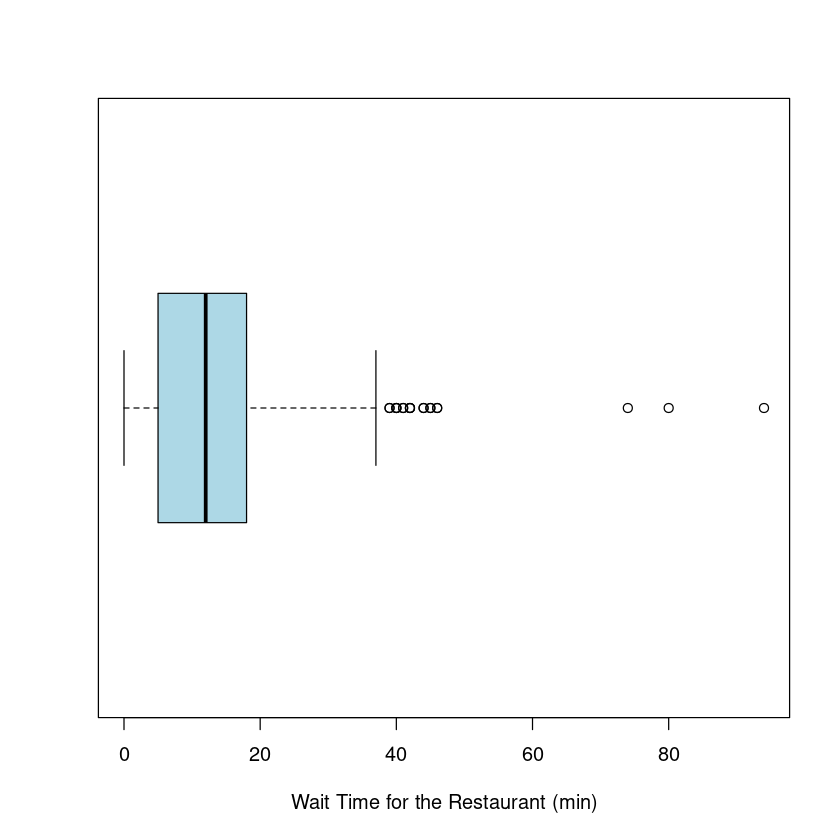

In [28]:
boxplot(wait_time, xlab = "Wait Time for the Restaurant (min)", horizontal = TRUE, col="lightblue")

Create *comparative boxplots* of wait time grouped by quality rating

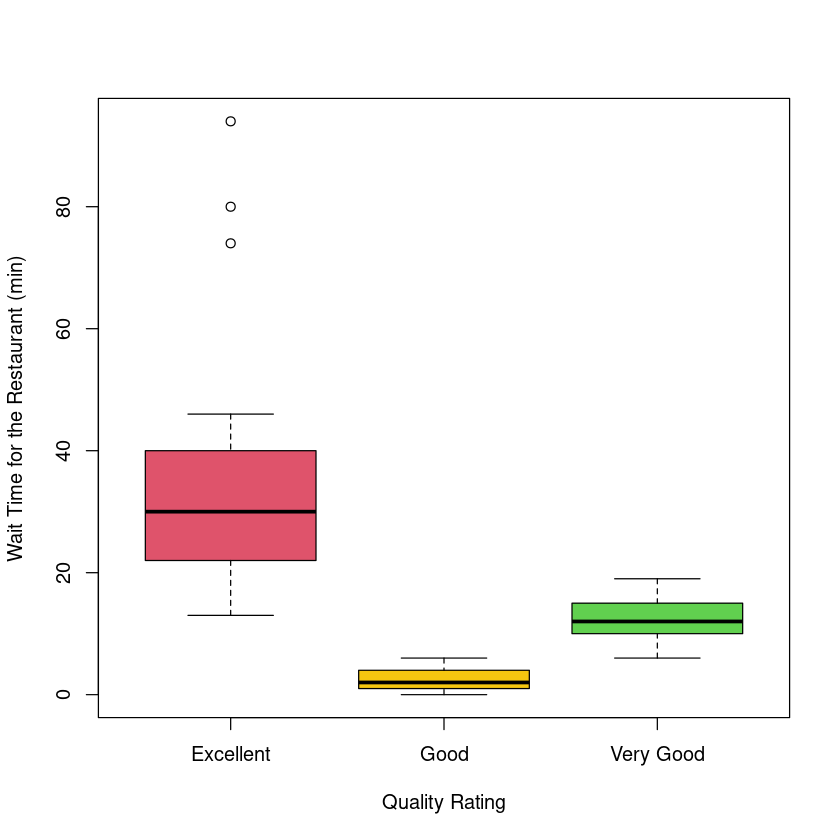

In [40]:
boxplot(Wait.Time..min. ~ Quality.Rating, data = restaurant_df, xlab = "Quality Rating", 
    ylab = "Wait Time for the Restaurant (min)", col = c(2, 7, 3))

## Outliers

### IQR Rule

Identifiy outliers using the IQR rule and store them in a vector

In [4]:
outliers <- boxplot(wait_time, plot=FALSE)$out
outliers

[1] 74 46 80 41 39 40 40 94 42 42 39 45 44 40 44 45 46 41 42

Count the number of outliers

In [5]:
length(outliers)

[1] 19

### Empirical Rule

Standardize the wait time data 

In [6]:
zscore_wait_time <- scale(wait_time)

Find the location of the outliers

In [7]:
location_outliers <- which( abs(zscore_wait_time) >3 )
location_outliers

[1]  4 24 85

Pin down the values of the outliers

In [8]:
outliers_empirical <- wait_time[location_outliers]
outliers_empirical

[1] 74 80 94

Count the number of outliers

In [9]:
length(outliers_empirical)

[1] 3

## Frequency Distributions

### Categorical Data

#### Frequency Distribution
Create a frequency distribution of quality rating

In [5]:
quality_rating = restaurant_df$Quality.Rating

In [30]:
head(quality_rating)

[1] "Good"      "Very Good" "Good"      "Excellent" "Very Good" "Good"

Use the `table` function to obtain the frequency distribution

In [6]:
quality_rating.freq = table(quality_rating)
quality_rating.freq

quality_rating
Excellent      Good Very Good 
       66        84       150 

In [33]:
transform(quality_rating.freq)

quality_rating,Freq
<fct>,<int>
Excellent,66
Good,84
Very Good,150


#### Relative Frequency Distribution
Create a relative frequency distribution of quality rating using the `prop.table` function (`prop` for proportion)

In [34]:
quality_rating.relfreq = prop.table(quality_rating.freq)
old = options(digits=2) 
transform(quality_rating.relfreq) 

quality_rating,Freq
<fct>,<dbl>
Excellent,0.22
Good,0.28
Very Good,0.50


Display the frequency and relative frequency distributions of quality rating

In [35]:
cbind(quality_rating.freq, quality_rating.relfreq) 

,quality_rating.freq,quality_rating.relfreq
Excellent,66,0.22
Good,84,0.28
Very Good,150,0.50


#### Visualization
Create a bar chart of quality rating

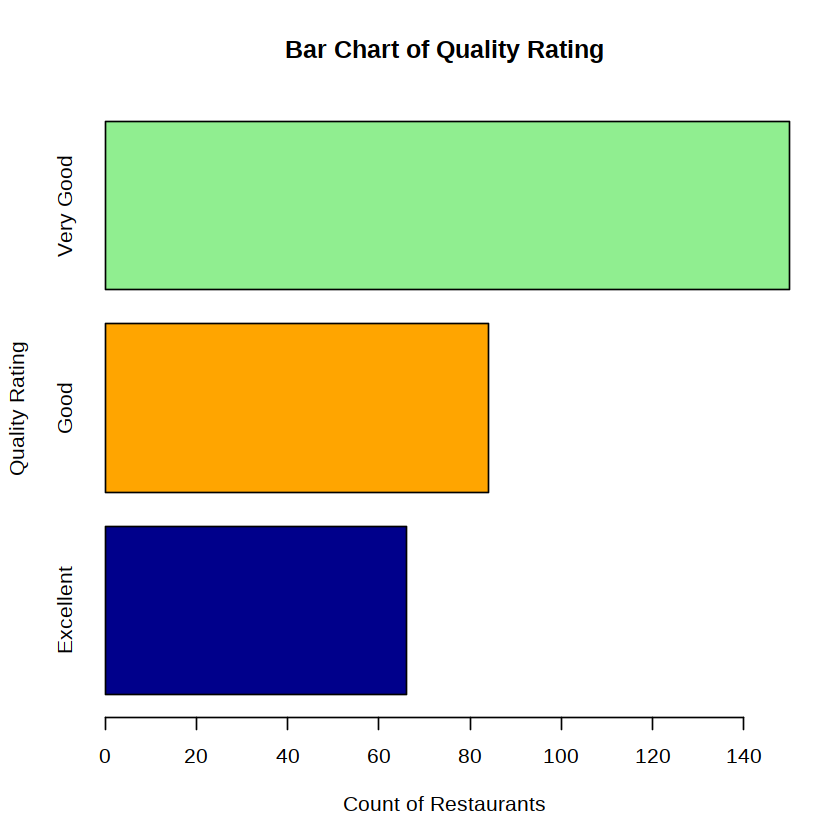

In [38]:
colors = c("darkblue", "orange", "lightgreen")
barplot(quality_rating.freq,        
         col=colors,
        ylab = "Quality Rating",
        xlab = "Count of Restaurants",
        main = "Bar Chart of Quality Rating", horiz = TRUE)    

Create a pie chart of quality rating

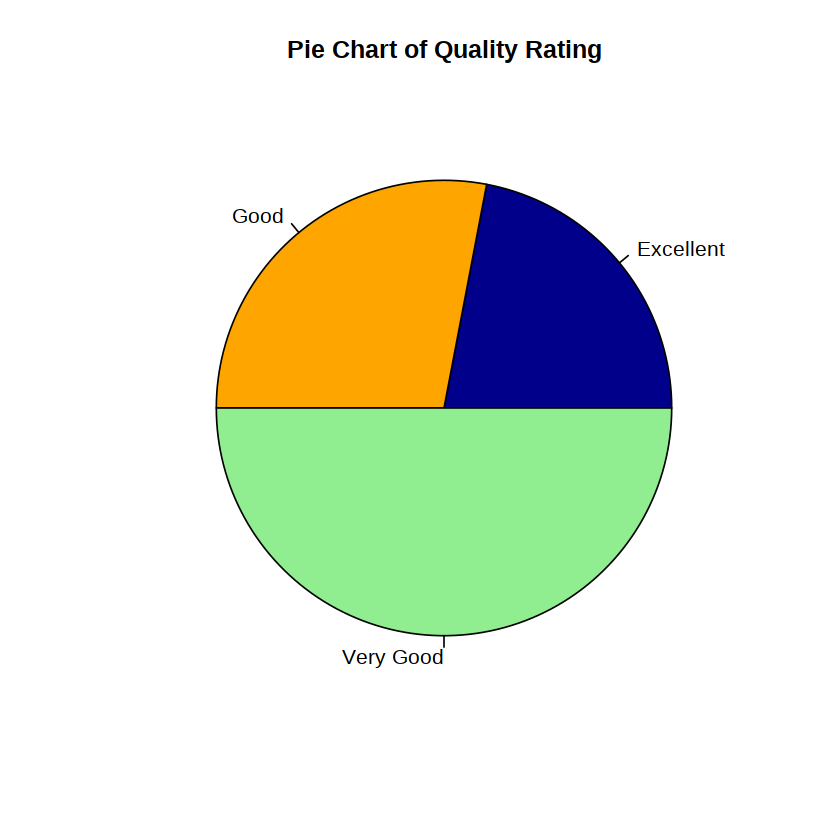

In [19]:
pie(quality_rating.freq,        
    col=colors,
    main = "Pie Chart of Quality Rating") 

### Quantitative Data

#### Frequency Distribution
Create a frequency distribution of wait time

Enter the `range` command for the minimum and maximum values

In [74]:
range(wait_time)

[1]  0 94

We will use a *bin width* of **10**. Type the `seq` command to generate an arithmetic sequence with a common difference 10. This gives the upper limit (inclusive) of each bin. 

In [3]:
bin_limits = seq(-1, 100, by = 10)
bin_limits

[1] -1  9 19 29 39 49 59 69 79 89 99

Next, for each observation of `wait time`, determine whether which bin its value falls into using the `cut` function, where `right = TRUE` specifies the upper bound of each bin is inclusive  

In [4]:
wait_time.cut = cut(wait_time, bin_limits, right = TRUE)
head(wait_time.cut)

[1] (-1,9]  (-1,9]  (-1,9]  (69,79] (-1,9]  (-1,9] 
10 Levels: (-1,9] (9,19] (19,29] (29,39] (39,49] (49,59] (59,69] ... (89,99]

In [110]:
head(wait_time)

[1]  5  6  1 74  6  5

As we can see from above, the **first** restaurant has a wait time of **5** minutes, and it falls into bin **'(-1,9]'**; the **fourth** resturant has a wait time of 74 minutes, and it falls into bin **'(69,79]'**

Finally, we can use the `table` function to generate the frequency distribution

In [21]:
wait_time.freq = table(wait_time.cut)
transform(wait_time.freq)

wait_time.cut,Freq
<fct>,<int>
"(-1,9]",118
"(9,19]",125
"(19,29]",22
"(29,39]",18
"(39,49]",14
"(49,59]",0
"(59,69]",0
"(69,79]",1
"(79,89]",1


#### Histogram
Plot the histogram using the `barplot` function. Set the `space` between columns to be **0** to comply with the convention of histograms.

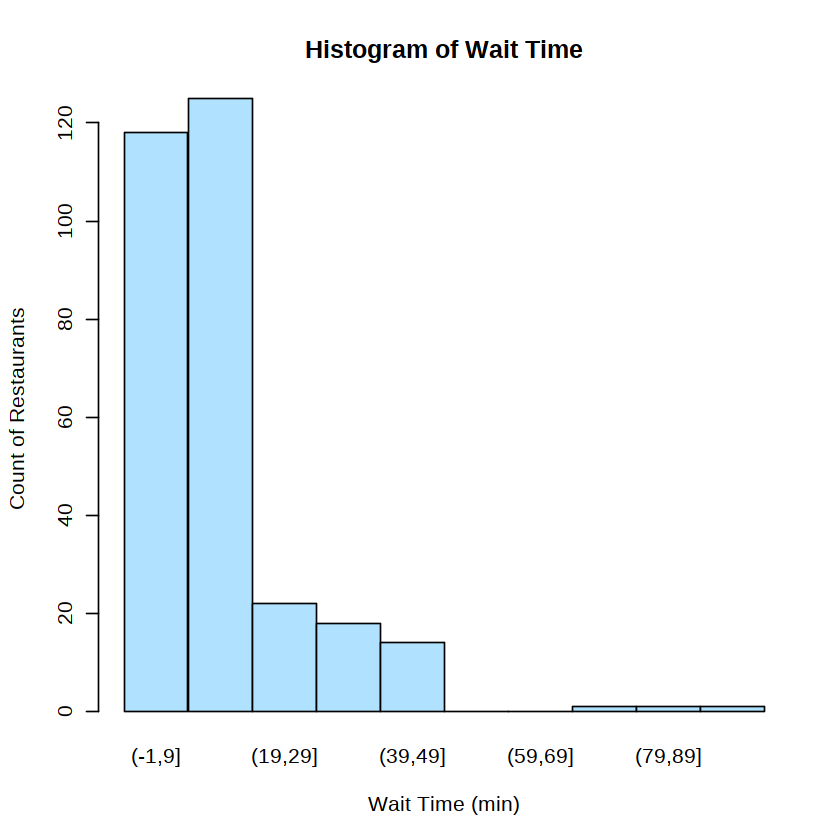

In [29]:
barplot(wait_time.freq,main = "Histogram of Wait Time", 
        xlab = "Wait Time (min)", ylab = "Count of Restaurants",
        space=c(0.2,0,0,0,0,0,0,0,0,0),col="lightskyblue1")    

Alternatively, we can use the `hist` function to plot the histogram. Set the parameter `breaks` to `bin_limits` defined earlier. 

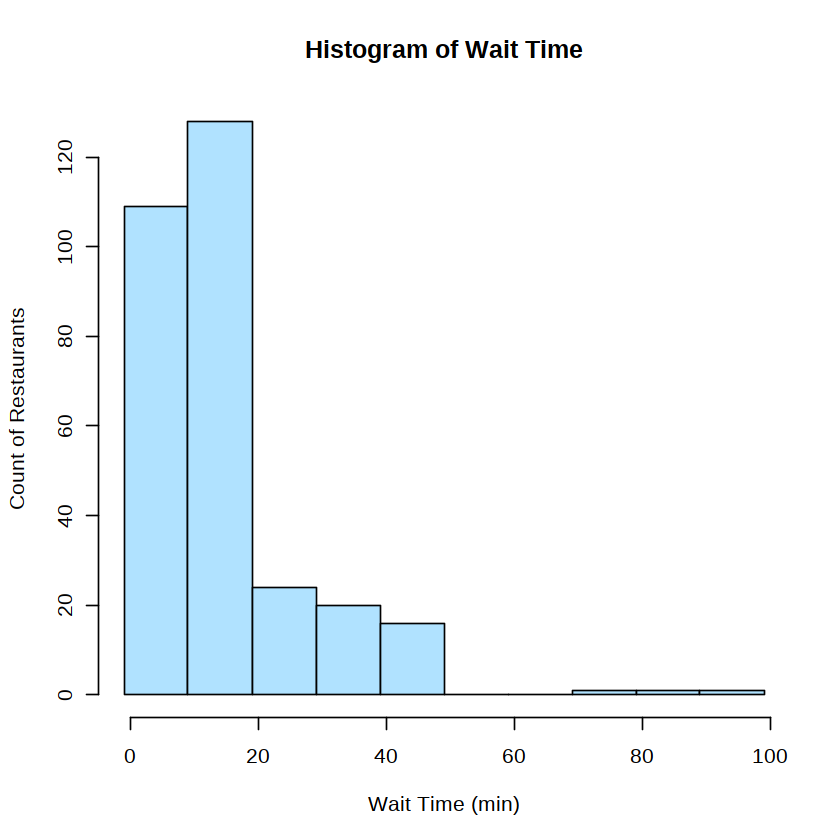

In [30]:
hist(wait_time, breaks = bin_limits, right = FALSE, 
     main = "Histogram of Wait Time",
     xlab = "Wait Time (min)", ylab = "Count of Restaurants",col="lightskyblue1")

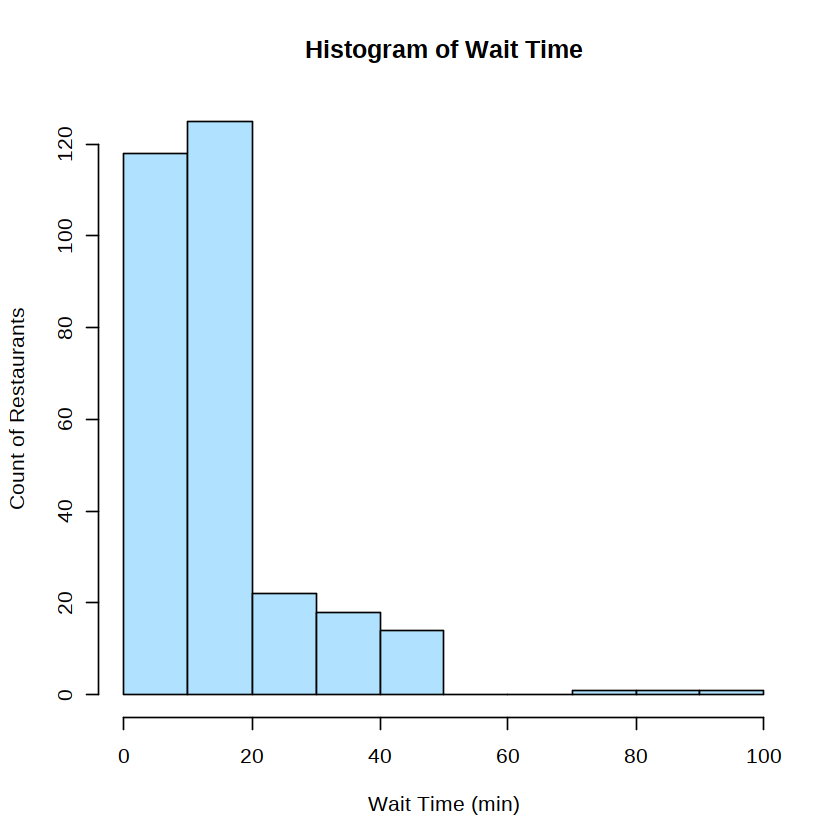

In [31]:
# histogram (automatic binning)
hist(wait_time,right = FALSE, 
     main = "Histogram of Wait Time",
     xlab = "Wait Time (min)", ylab = "Count of Restaurants",col="lightskyblue1")

Alternatively, the parameter `breaks` can specify (roughly) the number of bins. The following sets the number of bins to 20. See more here (https://felixfan.github.io/hist-bin-width/).

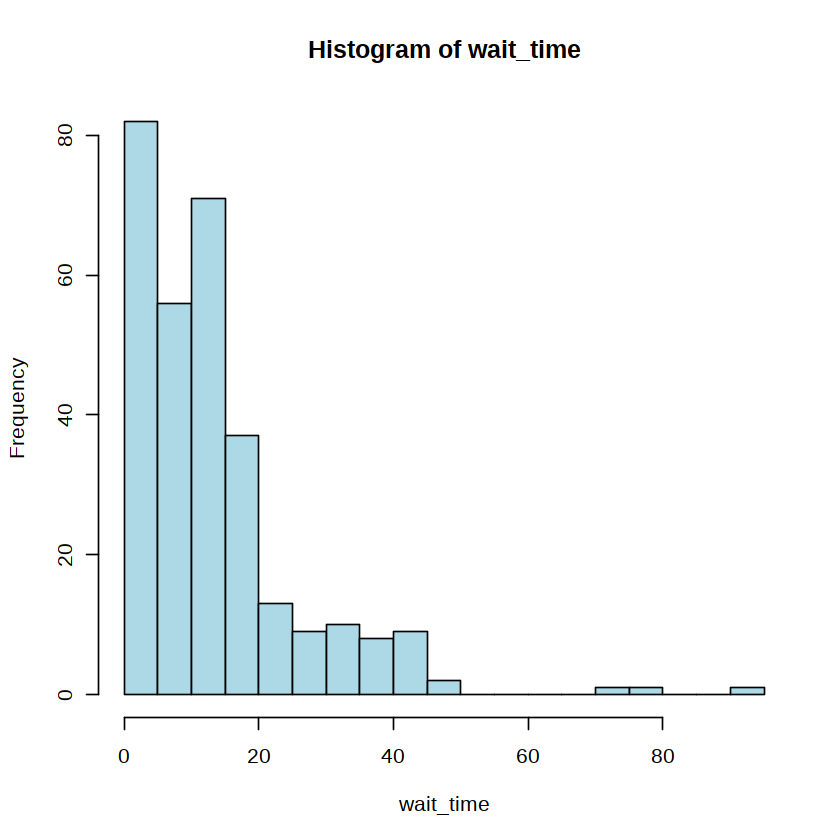

In [34]:
hist(wait_time,breaks=20,col="lightblue")

Plot the histogram of wait times only for "Very Good" restaurants

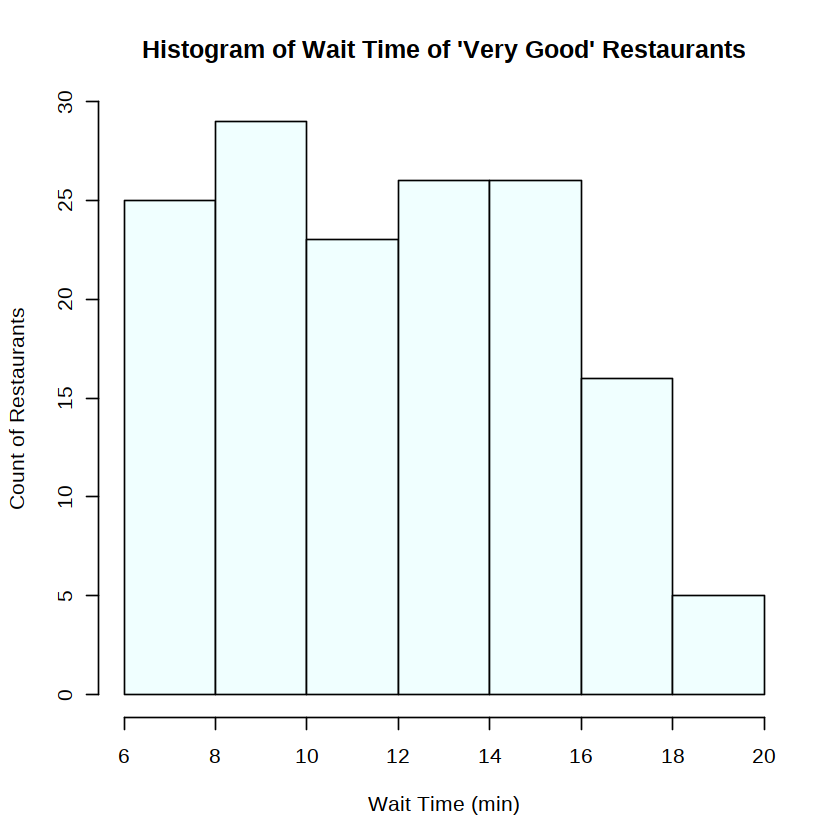

In [36]:
hist(restaurant_df$Wait.Time..min.[restaurant_df$Quality.Rating=='Very Good'], 
     main = "Histogram of Wait Time of 'Very Good' Restaurants",
     xlab = "Wait Time (min)", ylab = "Count of Restaurants",col="azure")

We observe that even though the wait times are right-skewed overall, they are more uniformly distributed for "Very Good" restaurants.

#### Relative Frequency Distribution
Create a relative frequency distribution of wait time

In [44]:
wait_time.relfreq = wait_time.freq / nrow(restaurant_df)
transform(wait_time.relfreq)

wait_time.cut,Freq
<fct>,<dbl>
"(-1,9]",0.393
"(9,19]",0.417
"(19,29]",0.073
"(29,39]",0.060
"(39,49]",0.047
"(49,59]",0.000
"(59,69]",0.000
"(69,79]",0.003
"(79,89]",0.003


#### Cumulative Frequency Distribution
Create a cumulative frequency distribution of wait time using the `cumsum` function.

In [50]:
wait_time.cumfreq = cumsum(wait_time.freq)
cbind(wait_time.cumfreq)

,wait_time.cumfreq
"(-1,9]",118
"(9,19]",243
"(19,29]",265
"(29,39]",283
"(39,49]",297
"(49,59]",297
"(59,69]",297
"(69,79]",298
"(79,89]",299
"(89,99]",300


Plot the cumulative frequency distribution.

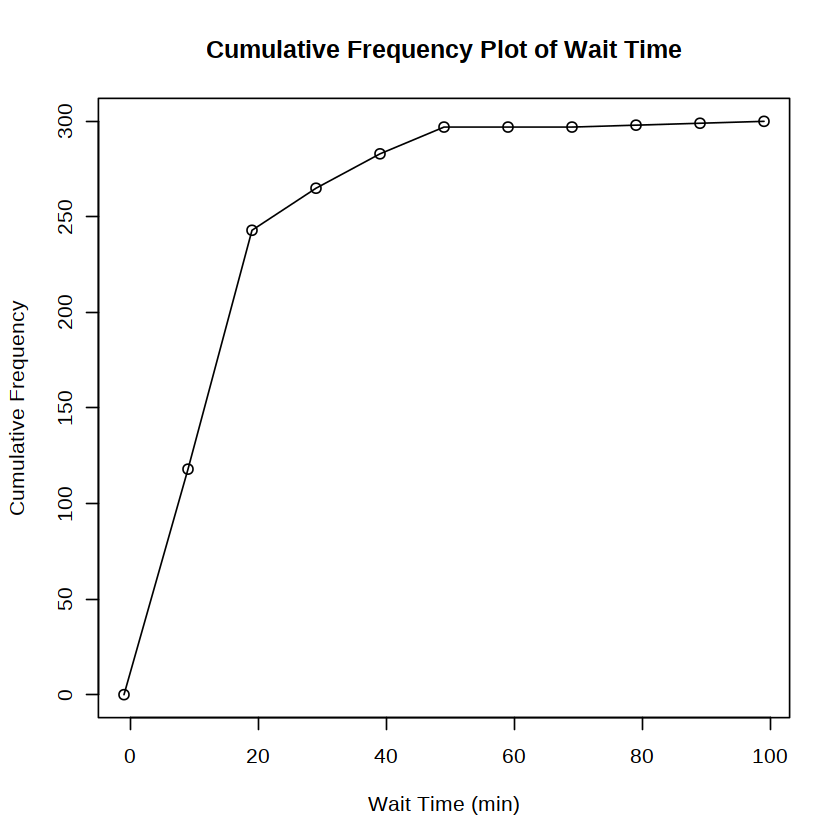

In [11]:
cumfreq0 = c(0, cumsum(wait_time.freq))
plot(bin_limits, cumfreq0,            
     main="Cumulative Frequency Plot of Wait Time", 
     xlab="Wait Time (min)",      
     ylab="Cumulative Frequency")   
lines(bin_limits, cumfreq0)        

Create a cumulative relative frequency distribution

In [12]:
wait_time.cumrelfreq = wait_time.cumfreq / nrow(restaurant_df)
old = options(digits=2)
cbind(wait_time.cumrelfreq)

,wait_time.cumrelfreq
"(-1,9]",0.39
"(9,19]",0.81
"(19,29]",0.88
"(29,39]",0.94
"(39,49]",0.99
"(49,59]",0.99
"(59,69]",0.99
"(69,79]",0.99
"(79,89]",1.00
"(89,99]",1.00


Plot the cumulative relative frequency distribution.

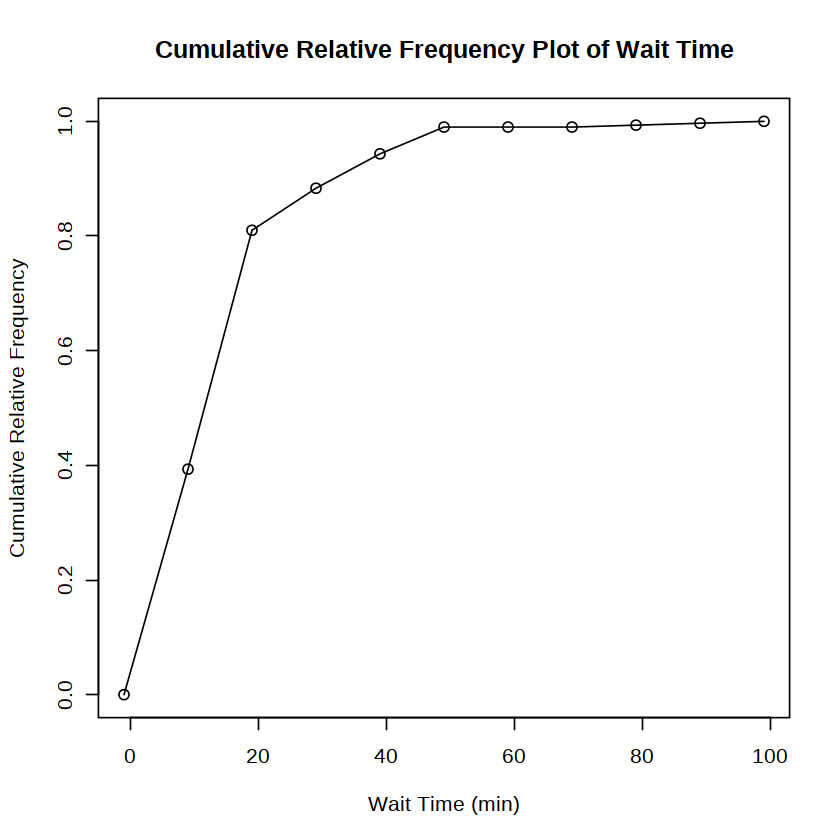

In [51]:
cumrelfreq0 = c(0, wait_time.cumrelfreq) 
plot(bin_limits, cumrelfreq0, 
     main="Cumulative Relative Frequency Plot of Wait Time", 
     xlab="Wait Time (min)", 
     ylab="Cumulative Relative Frequency") 
lines(bin_limits, cumrelfreq0)     

Display frequency, relative frequency, cumulative frequency, and cumulative relative frequency.

In [127]:
cbind(wait_time.freq,wait_time.relfreq, wait_time.cumfreq, wait_time.cumrelfreq)

,wait_time.freq,wait_time.relfreq,wait_time.cumfreq,wait_time.cumrelfreq
"(-1,9]",118,0.3933,118,0.39
"(9,19]",125,0.4167,243,0.81
"(19,29]",22,0.0733,265,0.88
"(29,39]",18,0.0600,283,0.94
"(39,49]",14,0.0467,297,0.99
"(49,59]",0,0.0000,297,0.99
"(59,69]",0,0.0000,297,0.99
"(69,79]",1,0.0033,298,0.99
"(79,89]",1,0.0033,299,1.00
"(89,99]",1,0.0033,300,1.00


Scatter plot

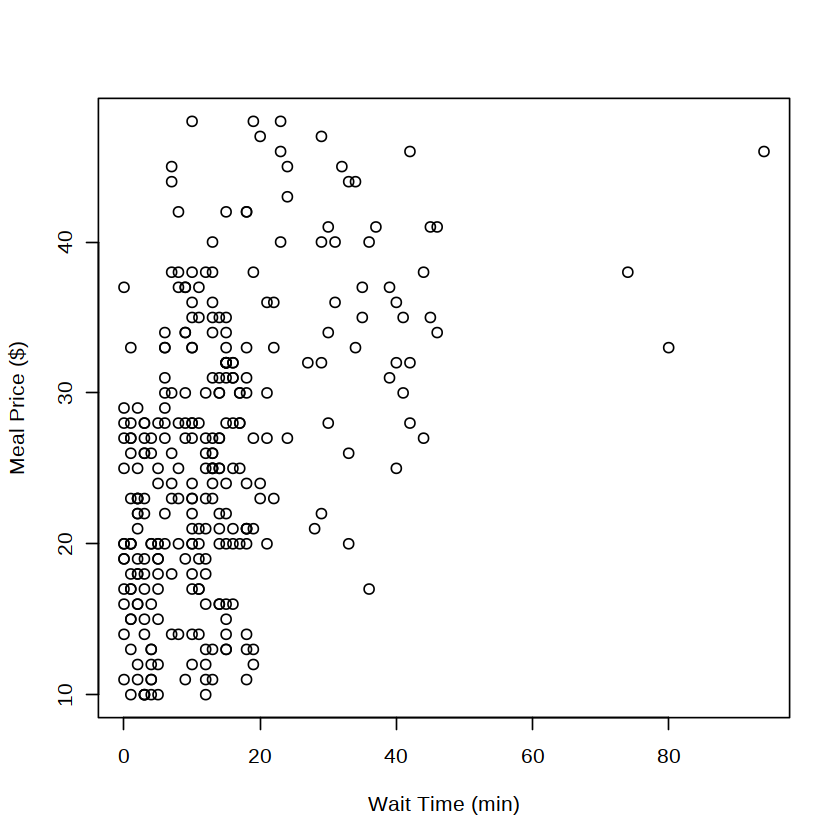

In [14]:
meal_price <- restaurant_df$Meal.Price....
plot(wait_time,meal_price,
     xlab = "Wait Time (min)",
     ylab = "Meal Price ($)")

## Resources
* Keyboard shortcuts for Jupyter Notebook: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/